All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p.125:
> This problem focuses on the collinearity problem.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from my_utils import lm_plot


sns.set()
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# (a)

From the textbook, p. 125:
> Perform the following commands in R:
```
set.seed(1)
x1 = runif(100)
x2 = 0.5*x1 + rnorm(100)/10
y = 2 + 2*x1 + 0.3*x2 + rnorm(100)
```
The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?

In [2]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5*x1 + np.random.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100)

# (b)

From the textbook, p. 125:
> What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables.

Correlation between x1 and x2: 0.839


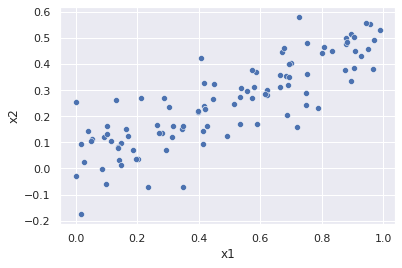

In [3]:
sns.scatterplot(x=x1, y=x2)
plt.xlabel('x1')
plt.ylabel('x2')
print(f'Correlation between x1 and x2: {np.corrcoef(x1, x2)[0, 1]:.3f}')

# (c)

From the textbook, p. 125:
> Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $\hat{\beta_0}$, $\hat{\beta_1}$, and $\hat{\beta_2}$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

In [4]:
x_df = pd.DataFrame({'Intercept' : 1
                     , 'x1' : x1
                     , 'x2' : x2
                    }
)
model_c = sm.regression.linear_model.OLS(y, x_df).fit(use_t=True)
print(f'R^2: {model_c.rsquared}')
pd.DataFrame({'coefficient' : model_c.params
              , 'p-value' : model_c.pvalues
             }
)

R^2: 0.26050814407433387


,coefficient,p-value
Intercept,2.189284,8.532403e-19
x1,0.704629,2.712146e-01
x2,2.502405,3.060418e-02


$\hat{\beta_0} = 2.189 \; (\beta_0 = 2);$

$\hat{\beta_1} = 0.705 \; (\beta_1 = 2);$

$\hat{\beta_2} = 2.502 \; (\beta_2 = 0.3);$

Notes:
1. Betas are quite different.
1. I cannot reject the null hypothesis $H_0 : \beta_1 = 0$.
1. I can reject the null hypothesis $H_0 : \beta_1 = 0$ at alpha-level of 0.05.

# (d)

From the textbook, p. 126:
> Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [5]:
model_d = sm.regression.linear_model.OLS(y, x_df[['Intercept', 'x1']]).fit(use_t=True)
print(f'R^2: {model_d.rsquared}')
pd.DataFrame({'coefficient' : model_d.params
              , 'p-value' : model_d.pvalues
             }
)

R^2: 0.22380210449292925


,coefficient,p-value
Intercept,2.248581,2.942644e-19
x1,1.876987,6.683125e-07


$R^2$ is low, but $\hat{\beta_1}$ has high statistical significance.

# (e)

From the textbook, p. 126:
> Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [6]:
model_e = sm.regression.linear_model.OLS(y, x_df[['Intercept', 'x2']]).fit(use_t=True)
print(f'R^2: {model_e.rsquared}')
pd.DataFrame({'coefficient' : model_e.params
              , 'p-value' : model_e.pvalues
             }
)

R^2: 0.25117295449150645


,coefficient,p-value
Intercept,2.265526,2.952030e-21
x2,3.561276,1.090964e-07


$R^2$ is low, but $\hat{\beta_2}$ has high statistical significance.

# (f)

From the textbook, p. 126:
> Do the results obtained in (c)–(e) contradict each other? Explain your answer.

`x1` has low statistical significance when fitted together with `x2` and high statistical significance on its own. This happens because `x2` is highly correlated with `x1`; thus it does not provide much of new information to the model.

# (g)

From the textbook, p. 126:
> Now suppose we obtain one additional observation, which was unfortunately mismeasured.
```
x1 = c(x1, 0.1)
x2 = c(x2, 0.8)
y = c(y, 6)
```
Re-fit the linear models from (c) to (e) using this new data.

Correlation between x1 and x2: 0.839


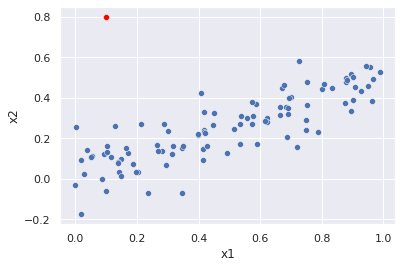

In [7]:
x_df = x_df.append({'Intercept' : 1
                    , 'x1' : 0.1
                    , 'x2' : 0.8
                   }
                   , ignore_index=True
                  )
y = np.append(y, 6)

sns.scatterplot(x='x1', y='x2', data=x_df)
sns.scatterplot(x=[0.1], y=[0.8], color='red')
plt.xlabel('x1')
plt.ylabel('x2')
print(f'Correlation between x1 and x2: {np.corrcoef(x1, x2)[0, 1]:.3f}')

In [8]:
model_g_c = sm.regression.linear_model.OLS(y, x_df).fit(use_t=True)
print(f'R^2: {model_g_c.rsquared}')
pd.DataFrame({'coefficient' : model_g_c.params
              , 'p-value' : model_g_c.pvalues
             }
)

R^2: 0.28901944274043034


,coefficient,p-value
Intercept,2.199575,6.778773e-19
x1,0.220026,6.732535e-01
x2,3.439188,2.054951e-04


In [9]:
model_g_d = sm.regression.linear_model.OLS(y, x_df[['Intercept', 'x1']]).fit(use_t=True)
print(f'R^2: {model_g_d.rsquared}')
pd.DataFrame({'coefficient' : model_g_d.params
              , 'p-value' : model_g_d.pvalues
             }
)

R^2: 0.18109371241919647


,coefficient,p-value
Intercept,2.358326,1.407481e-19
x1,1.722523,9.151627e-06


In [10]:
model_g_e = sm.regression.linear_model.OLS(y, x_df[['Intercept', 'x2']]).fit(use_t=True)
print(f'R^2: {model_g_e.rsquared}')
pd.DataFrame({'coefficient' : model_g_e.params
              , 'p-value' : model_g_e.pvalues
             }
)

R^2: 0.2877215955818587


,coefficient,p-value
Intercept,2.233127,1.358505e-21
x2,3.721606,7.406825e-09


> What effect does this new observation have on the each of the models?

1. For `model_c`, $R^2$ went up.
1. For `model_d`, $R^2$ went down.
1. For `model_e`, $R^2$ went up. 

> In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [11]:
def last_point_info(model):
  """Prints some info about a last added point of a linear model."""
  influence = model.get_influence()
  f = model.fittedvalues.iloc[-1]
  r = model.resid.iloc[-1]
  # Standardized residual:
  t = influence.resid_studentized_internal[-1]
  # Leverage:
  h = influence.hat_matrix_diag[-1]
  # Cook's distance:
  c = t**2 * h / 2 / (1 - h)
  print(f'Standardized residual of the last point: {t}')
  print(f'Leverage of the last point: {h}')
  print(f'Cook\'s distance of the last point: {c}')
  fig, axs = lm_plot(model, pred_number=2)
  sns.scatterplot(x=[f], y=[r], color='red', ax=axs[0, 0])
  axs[0, 0].set_xlim(axs[0, 0].get_xlim()[0]-0.2, axs[0, 0].get_xlim()[1]+0.2)
  sns.scatterplot(x=[f], y=[t**0.5], color='red', ax=axs[1, 0])
  axs[1, 0].set_xlim(axs[0, 0].get_xlim()[0]-0.2, axs[0, 0].get_xlim()[1]+0.2)
  sns.scatterplot(x=[h], y=[t], color='red', ax=axs[1, 1])

Standardized residual of the last point: 1.305373283237972
Leverage of the last point: 0.40916108676876173
Cook's distance of the last point: 0.5900172062632486


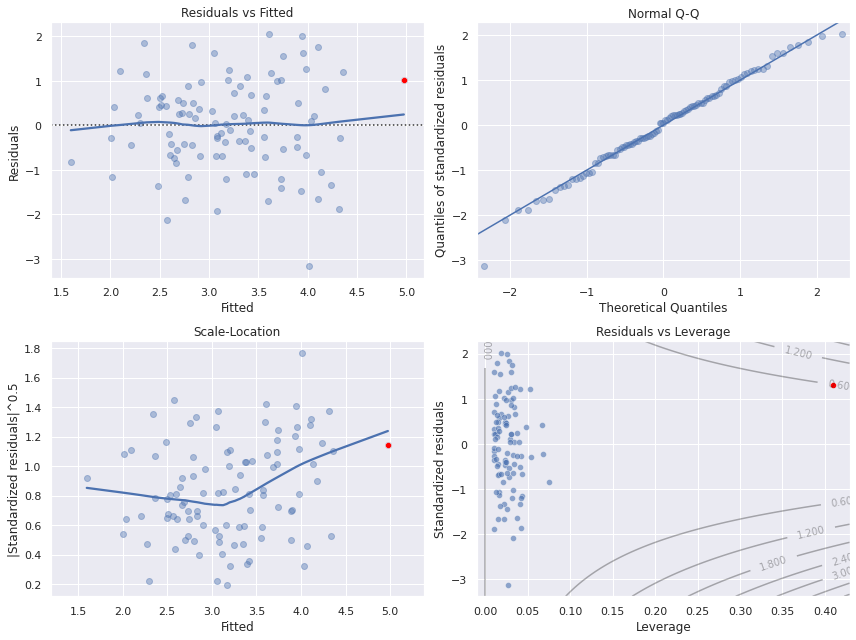

In [12]:
last_point_info(model_g_c)
plt.tight_layout()

The new point is not an outlier, but has high leverage. Probably this is an influential point.

Standardized residual of the last point: 3.2171030910350265
Leverage of the last point: 0.026460664578732602
Cook's distance of the last point: 0.14065241848755164


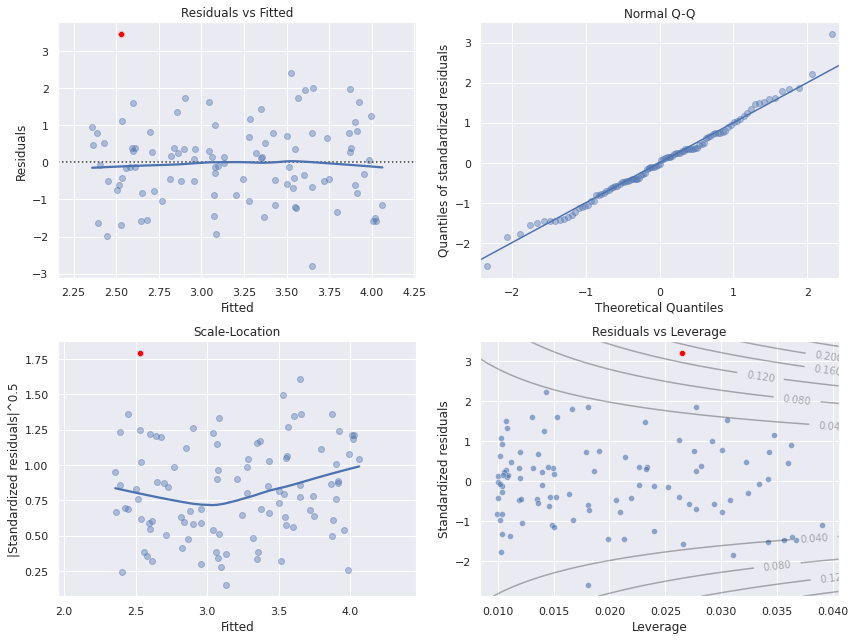

In [27]:
last_point_info(model_g_d)
plt.tight_layout()

The new point is an outlier with low leverage.

Standardized residual of the last point: 0.820275569616599
Leverage of the last point: 0.10826648419714885
Cook's distance of the last point: 0.04084590308013152


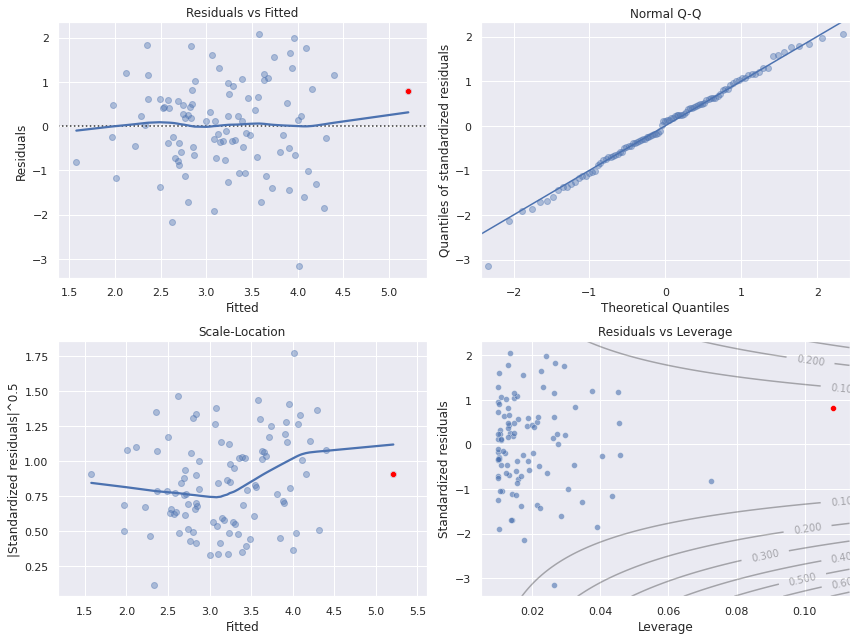

In [28]:
last_point_info(model_g_e)
plt.tight_layout()

The new point is not an outlier, but has high(-ish) leverage (but significantly lower than in `model_g_c`, which has both `x1` and `x2`). Probably this is not an influential point.